#  911 Calls Capstone Project

For this project an Open dataset from kaggle was used to analyze Emergency (911)calls from Montgomery County, Pennysylvania(PA)
The dataset contains the following fields;

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

More information about the dataset can be found here https://bit.ly/3xSJbxL

In [1]:
#import important maths and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#read the 911 csv
df = pd.read_csv('911.csv')

In [6]:
#brief description of the dataframe that includes datatypes, indexes(rows) and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
#check head of the dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [14]:
#(optiona) dropping the 'e' column in the dataset.
# -- df.drop('e', axis = 1, inplace = True)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


## Questions on the dataset

What are the top 5 zipcodes for 911 calls

In [17]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

what are the top 5 townships in the dataset

In [20]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many Unique title codes are in the title columns

In [23]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [25]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column? **

In [32]:
#top reason
df['Reason'].value_counts().head(1)
# top 3 reasons
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**use seaborn to create a countplot of 911 calls by Reason. **

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='Reason', ylabel='count'>

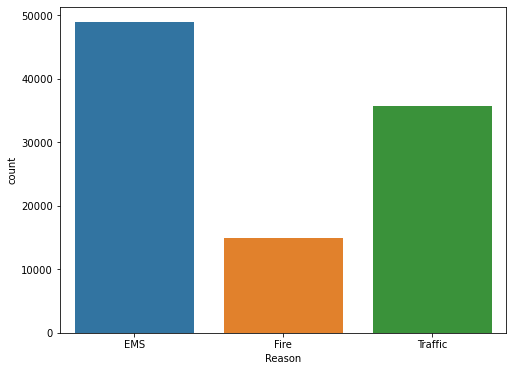

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(x ='Reason', data = df )

**What is the data type of the objects in the timeStamp column? **

In [50]:
#check the datatype of the first value
type(df['timeStamp'].iloc[0])

str

**Use pd.to_datetime to convert the column from strings to DateTime objects. **

In [52]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.8+ MB


In [59]:
#You can now access attributes and methods from the dateTime object in python
time = df['timeStamp'].iloc[0]
time.hour
time.is_leap_year

False

In [56]:
time

Timestamp('2015-12-10 17:40:00')

In [61]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [62]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [65]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [68]:
df['Day Of Week'] = df['Day Of Week'].map(dmap)

In [73]:
df.drop('Day of Week',axis = 1, inplace = True)

In [74]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

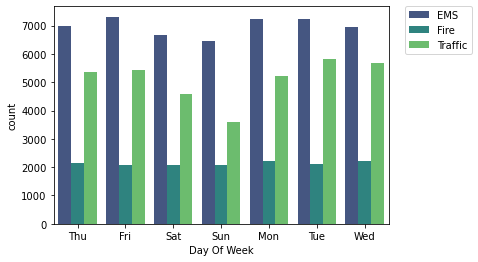

In [78]:
#create a countplot and hue based on the reason for the Emergency call
sns.countplot(x = 'Day Of Week', data = df, hue = 'Reason', palette = 'viridis')

#relocate the Legend to the outside of the drawing
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad= 0)

Now do the same for Month:

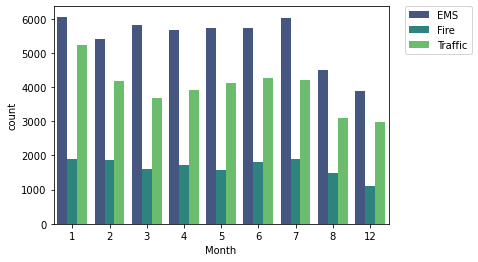

In [79]:
#create a countplot and hue based on the reason for the Emergency call
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')

#relocate the Legend to the outside of the drawing
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad= 0)

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [83]:
bymonth = df.groupby('Month').count()

In [85]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day Of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969


**create a simple plot off the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='Month'>

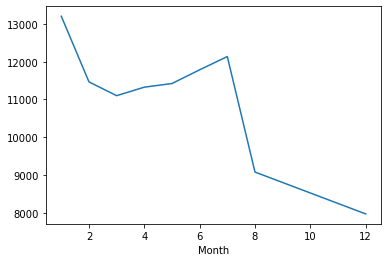

In [87]:
bymonth['lat'].plot()

**Use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

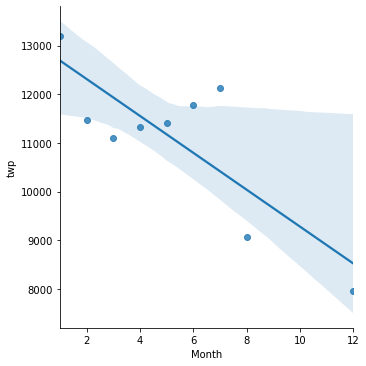

In [89]:
sns.lmplot(x = 'Month', y = 'twp', data = bymonth.reset_index())

*Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.*

In [90]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())

In [91]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015-12-10


**Using groupby on the Date column with the count() aggregate to create a plot of counts of 911 calls.**

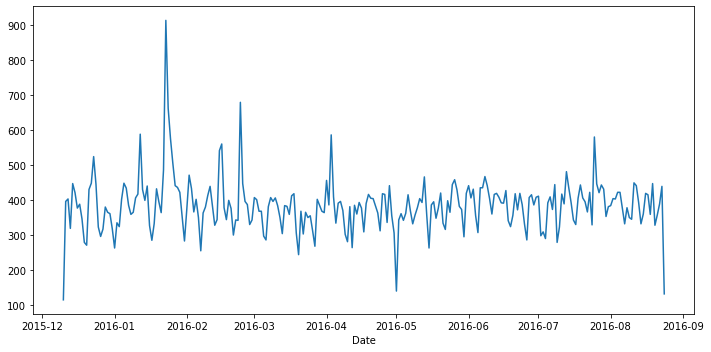

In [112]:
#group data by date, count and plot the latitude of those calls made
df.groupby('Date').count()['lat'].plot(figsize = (10,5))
plt.tight_layout()  #spread out the x-axis for visibility

**Recreating the plot but with 3 seperate plots with each plot representing a Reason for the 911 calls**

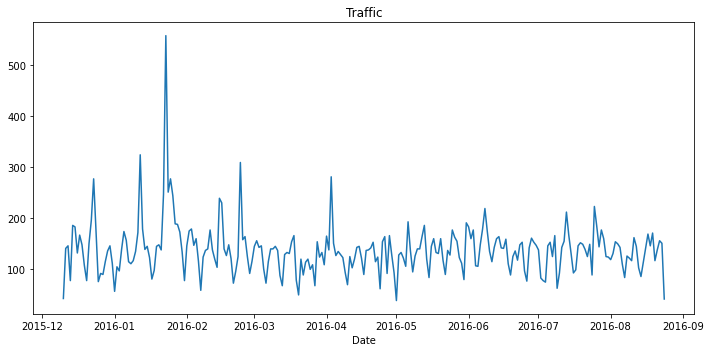

In [118]:
plt.title('Traffic')
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize =(10,5))
plt.tight_layout()

**inference:** highest number of traffic calls were made in january of the year at this date -->

reference code to get the date df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].idxmax()

date(2016, 1, 23)

In [131]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].idxmax()

datetime.date(2016, 1, 23)

In [119]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

<AxesSubplot:title={'center':'EMS'}, xlabel='Date'>

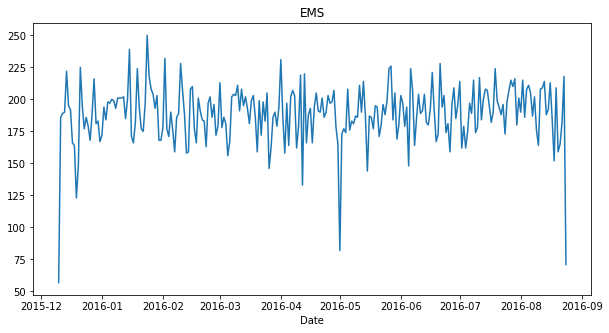

In [120]:
plt.title('EMS')
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize = (10,5))

<AxesSubplot:title={'center':'Fire'}, xlabel='Date'>

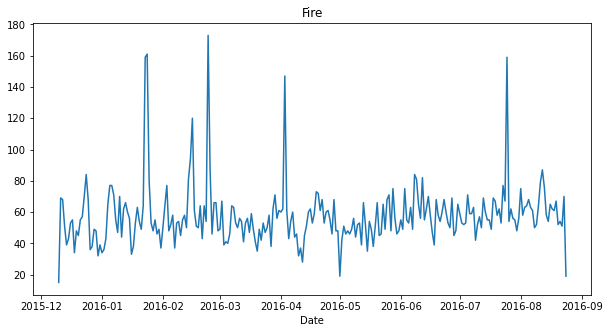

In [121]:
plt.title('Fire')
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize = (10,5))

**Creating Heatmaps with Seaborn by using the Unstack method and groupby to adjust the data to account for Day of week and Hour**

In [140]:
dayHour = df.groupby(by= ['Day Of Week', 'Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day Of Week'>

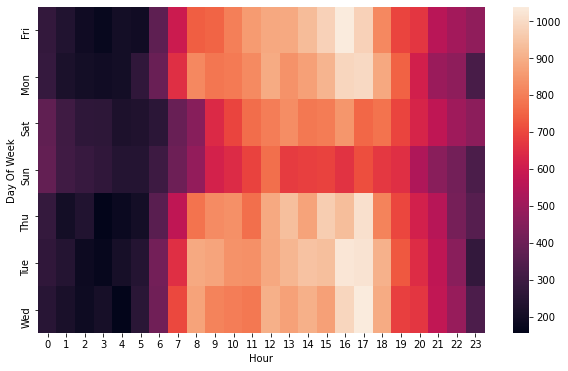

In [142]:
plt.figure(figsize = (10,6))
sns.heatmap(dayHour)

**Inference**: HeatMap is dark in to the left and right extremes which denote early and late hours of the days that represent midnight; which makes sense becasuse of less human activity at night.

**Creating a cluster map from the reformed data**

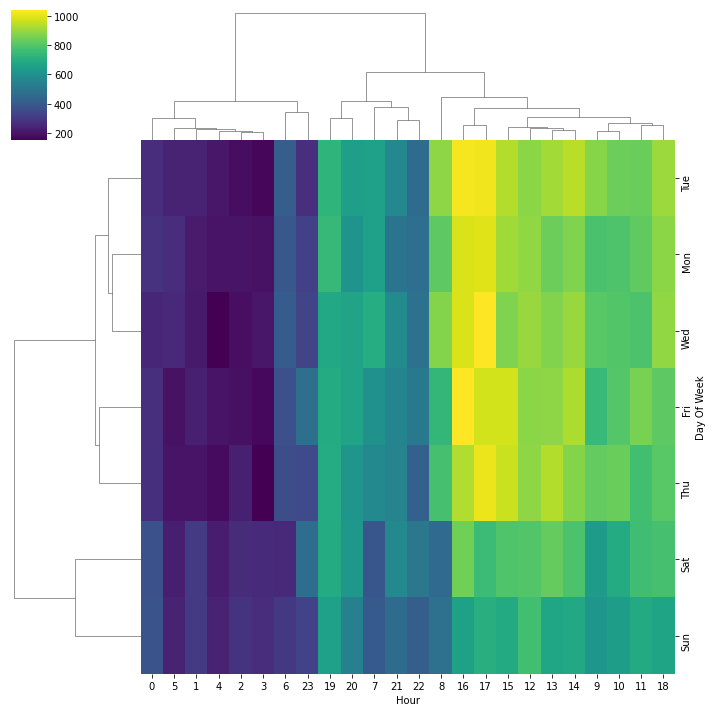

In [144]:
sns.clustermap(dayHour,cmap = 'viridis')

**Creating Heatmaps with Seaborn by using the Unstack method and groupby to adjust the data to account for Month**

In [ ]:
#data has to be adjusted to matrix form using the unstack method to allow cluster and heatmap plotting

In [146]:
dayMonth = df.groupby(by= ['Day Of Week', 'Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day Of Week'>

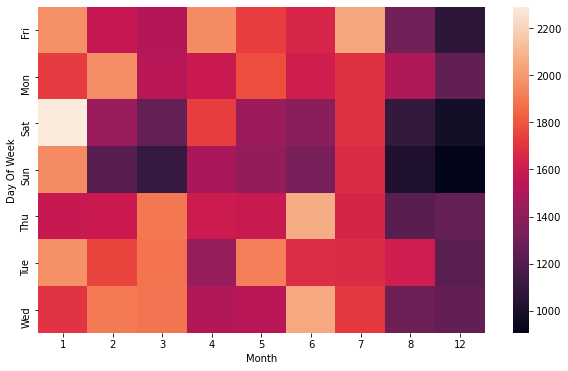

In [147]:
plt.figure(figsize = (10,6))
sns.heatmap(dayMonth)

<Figure size 720x432 with 0 Axes>

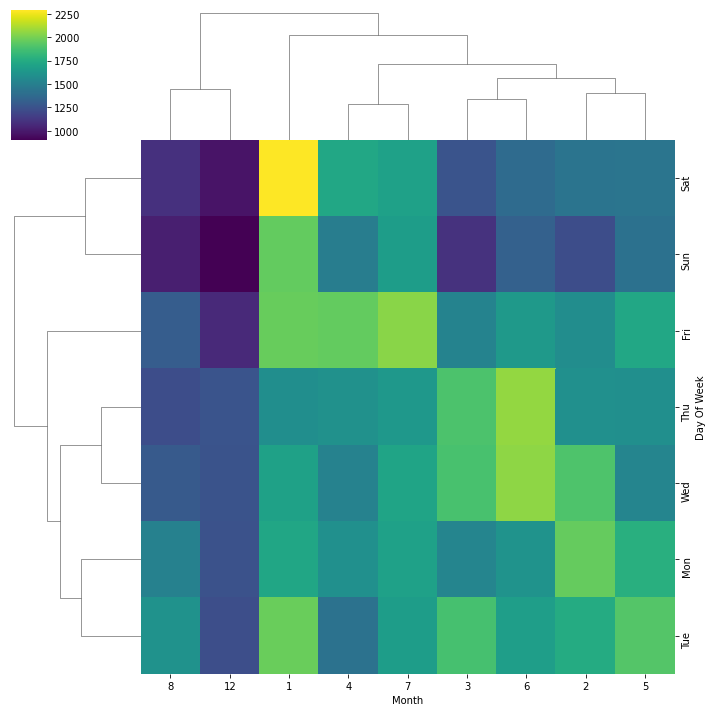

In [152]:
plt.figure(figsize = (10,6 ))
sns.clustermap(dayMonth,cmap = 'viridis')